In [214]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Read the first 2 rows of the data to retrieve the column names
df = pd.read_csv('Preprocessing_data/data.csv', header=[0,1])
df.columns




MultiIndex([(               'Year', 'Countries, territories and areas'),
            (              ' 2019',                      ' Both sexes'),
            (              ' 2019',                            ' Male'),
            (              ' 2019',                          ' Female'),
            (              ' 2018',                      ' Both sexes'),
            (              ' 2018',                            ' Male'),
            (              ' 2018',                          ' Female'),
            (              ' 2017',                      ' Both sexes'),
            (              ' 2017',                            ' Male'),
            (              ' 2017',                          ' Female'),
            (              ' 2016',                      ' Both sexes'),
            (              ' 2016',                            ' Male'),
            (              ' 2016',                          ' Female'),
            (              ' 2015',                

In [ ]:
#Processing and column name by deleting white space and renaming the column name
df.columns = pd.MultiIndex.from_tuples(
    [(col[0] if "Unnamed" not in col[0] else "continent_list", col[1]) for col in df.columns]
)
df.columns = pd.MultiIndex.from_tuples(
    [(col[0].strip(), col[1].strip()) for col in df.columns]
)
#Sort all countries by their continent
df_sorted = df.sort_values(by=[("continent_list", "Continent")], ascending=True)
df_sorted

Year       2019                    2018  \
       Countries, territories and areas Both sexes  Male Female Both sexes   
0                           Afghanistan       15.9  24.8    6.4       14.2   
1                               Albania       11.7  17.6    5.5       11.0   
2                               Algeria       20.9  28.1   13.6       21.0   
3                                Angola       26.1  34.3   18.2       26.0   
4                   Antigua and Barbuda        0.0   0.0    0.0        0.0   
..                                  ...        ...   ...    ...        ...   
178  Venezuela (Bolivarian Republic of)       39.0  66.1   12.7       38.2   
179                            Viet Nam       30.6  47.8   13.3       29.2   
180                               Yemen       29.4  39.4   19.1       28.4   
181                              Zambia       20.5  30.8   10.3       20.5   
182                            Zimbabwe       41.2  67.9   16.9       40.6   

                       2017               ...       2002               \
     Male Female Both sexes  Male Female  ... Both sexes  Male Female   
0    22.7    5.3       15.1  23.8    6.0  ...       14.9  22.7    6.7   
1    16.7    5.1       11.4  17.4    5.3  ...       14.5  22.5    6.3   
2    28.1   13.6       21.0  28.2   13.7  ...       22.8  31.4   14.0   
3    34.4   17.8       25.5  33.3   17.8  ...       25.4  29.0   21.8   
4     0.0    0.0        0.0   0.0    0.0  ...        2.6   5.4    0.0   
..    ...    ...        ...   ...    ...  ...        ...   ...    ...   
178  64.7   12.4       37.8  64.0   12.1  ...       29.9  46.0   13.6   
179  45.8   12.6       27.8  43.8   11.9  ...       24.3  38.5   10.4   
180  37.9   18.8       27.5  37.1   17.7  ...       22.0  28.3   15.6   
181  30.9   10.4       20.6  30.8   10.5  ...       26.9  38.5   15.5   
182  66.8   16.8       40.1  65.7   16.7  ...       32.4  57.5    8.6   

          2001                    2000              continent_list  
    Both sexes  Male Female Both sexes  Male Female      Continent  
0         15.1  23.0    6.7       14.7  22.3    6.6           Asia  
1         14.5  22.5    6.3       14.3  22.4    6.1         Europe  
2         22.7  31.3   13.8       22.5  31.2   13.6         Africa  
3         25.2  28.4   22.0       25.1  27.9   22.3         Africa  
4         13.0  25.6    1.8        9.2  16.3    2.9  North America  
..         ...   ...    ...        ...   ...    ...            ...  
178       30.0  48.8   11.1       27.4  44.0   10.7  South America  
179       24.2  38.1   10.5       24.1  37.9   10.6           Asia  
180       22.0  28.2   15.6       21.9  28.0   15.7           Asia  
181       27.2  38.6   16.0       27.4  38.3   16.6         Africa  
182       29.7  53.2    7.4       29.3  52.7    6.9         Africa  

[183 rows x 62 columns]

In [244]:
both_sexes_cols = [(str(year).strip(), "Both sexes") for year in range(2000, 2020) if (str(year).strip(), "Both sexes") in df.columns]

# Group by continent and calculate it for each year
df_sum_continent = df_sorted.groupby(("continent_list", "Continent"))[both_sexes_cols].mean()

both_sexes_cols = [col for col in df_sum_continent.columns if col[1] == "Both sexes"]





In [245]:
df_sum_continent["sum_both_sexes"] = df_sum_continent[both_sexes_cols].mean(axis=1)

df_sum_continent

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,sum_both_sexes
,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,...,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,
"(continent_list, Continent)",,,,,,,,,,,,,,,,,,,,,
Africa,27.018519,26.762963,27.166667,27.264815,27.259259,26.990741,26.940741,26.779630,26.483333,26.722222,...,26.538889,26.251852,26.220370,26.609259,26.962963,27.248148,27.424074,27.275926,27.550000,26.916296
Asia,17.057447,17.140426,17.525532,17.680851,18.082979,18.429787,18.527660,18.282979,17.885106,17.434043,...,17.106383,16.738298,16.308511,15.861702,15.848936,15.687234,15.278723,15.155319,15.063830,16.902553
Europe,14.084615,13.902564,13.817949,13.328205,13.007692,12.692308,12.533333,12.810256,11.702564,10.120513,...,8.697436,8.066667,7.879487,7.515385,7.415385,7.271795,6.769231,6.658974,6.297436,10.183205
North America,16.395238,16.514286,16.419048,16.338095,15.542857,15.495238,15.157143,15.842857,15.290476,14.276190,...,13.861905,13.123810,14.109524,13.047619,14.100000,14.966667,14.461905,15.200000,16.033333,14.960476
Oceania,13.250000,12.830000,12.900000,14.800000,13.430000,11.860000,12.960000,11.360000,11.150000,12.230000,...,9.320000,9.360000,9.410000,8.950000,9.290000,10.470000,10.420000,11.020000,12.010000,11.358000
South America,18.200000,17.341667,16.966667,17.450000,18.758333,18.858333,20.583333,20.658333,20.566667,19.950000,...,20.416667,19.608333,19.683333,20.083333,19.100000,18.816667,19.341667,19.200000,19.050000,19.196250


In [247]:
df_both_sexes = df_sum_continent.reset_index()
df_both_sexes.columns = ["Continent" if col == ("continent_list", "Continent") else "sum_both_sexes" if col == ("sum_both_sexes", "") else col for col in df_both_sexes.columns]
df_both_sexes.sort_values(by="sum_both_sexes", ascending=False, inplace=True)
total_both_sexes = df_both_sexes[["Continent", "sum_both_sexes"]]
total_both_sexes

,Continent,sum_both_sexes
0,Africa,26.916296
5,South America,19.196250
1,Asia,16.902553
3,North America,14.960476
4,Oceania,11.358000
2,Europe,10.183205


In [248]:
df_both_sexes

,Continent,"(2000, Both sexes)","(2001, Both sexes)","(2002, Both sexes)","(2003, Both sexes)","(2004, Both sexes)","(2005, Both sexes)","(2006, Both sexes)","(2007, Both sexes)","(2008, Both sexes)",...,"(2011, Both sexes)","(2012, Both sexes)","(2013, Both sexes)","(2014, Both sexes)","(2015, Both sexes)","(2016, Both sexes)","(2017, Both sexes)","(2018, Both sexes)","(2019, Both sexes)",sum_both_sexes
0,Africa,27.018519,26.762963,27.166667,27.264815,27.259259,26.990741,26.940741,26.779630,26.483333,...,26.538889,26.251852,26.220370,26.609259,26.962963,27.248148,27.424074,27.275926,27.550000,26.916296
5,South America,18.200000,17.341667,16.966667,17.450000,18.758333,18.858333,20.583333,20.658333,20.566667,...,20.416667,19.608333,19.683333,20.083333,19.100000,18.816667,19.341667,19.200000,19.050000,19.196250
1,Asia,17.057447,17.140426,17.525532,17.680851,18.082979,18.429787,18.527660,18.282979,17.885106,...,17.106383,16.738298,16.308511,15.861702,15.848936,15.687234,15.278723,15.155319,15.063830,16.902553
3,North America,16.395238,16.514286,16.419048,16.338095,15.542857,15.495238,15.157143,15.842857,15.290476,...,13.861905,13.123810,14.109524,13.047619,14.100000,14.966667,14.461905,15.200000,16.033333,14.960476
4,Oceania,13.250000,12.830000,12.900000,14.800000,13.430000,11.860000,12.960000,11.360000,11.150000,...,9.320000,9.360000,9.410000,8.950000,9.290000,10.470000,10.420000,11.020000,12.010000,11.358000
2,Europe,14.084615,13.902564,13.817949,13.328205,13.007692,12.692308,12.533333,12.810256,11.702564,...,8.697436,8.066667,7.879487,7.515385,7.415385,7.271795,6.769231,6.658974,6.297436,10.183205


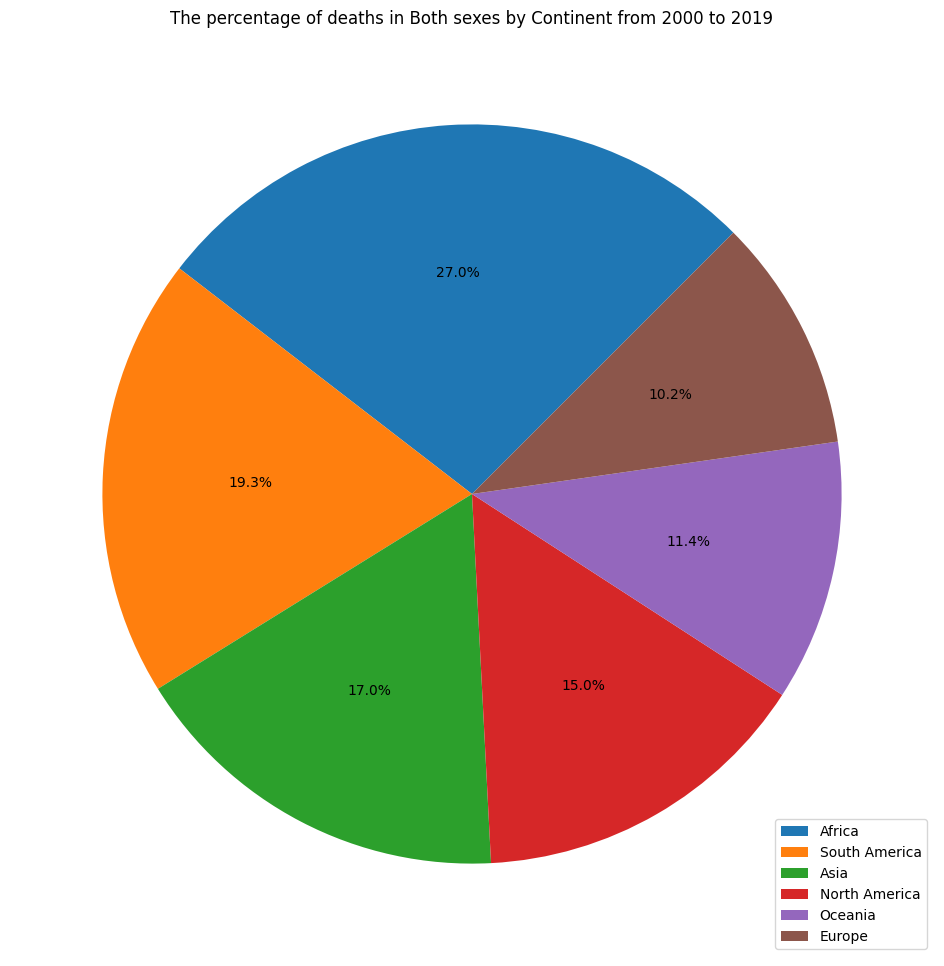

In [249]:
#draw pie chart
labels = df_both_sexes["Continent"]
sizes = df_both_sexes["sum_both_sexes"]
fig, ax = plt.subplots(figsize=(15, 12))
ax.pie(sizes,autopct='%1.1f%%', startangle=45)  
plt.legend(labels, loc="lower right")
plt.title("The percentage of deaths in Both sexes by Continent from 2000 to 2019")  
plt.show()

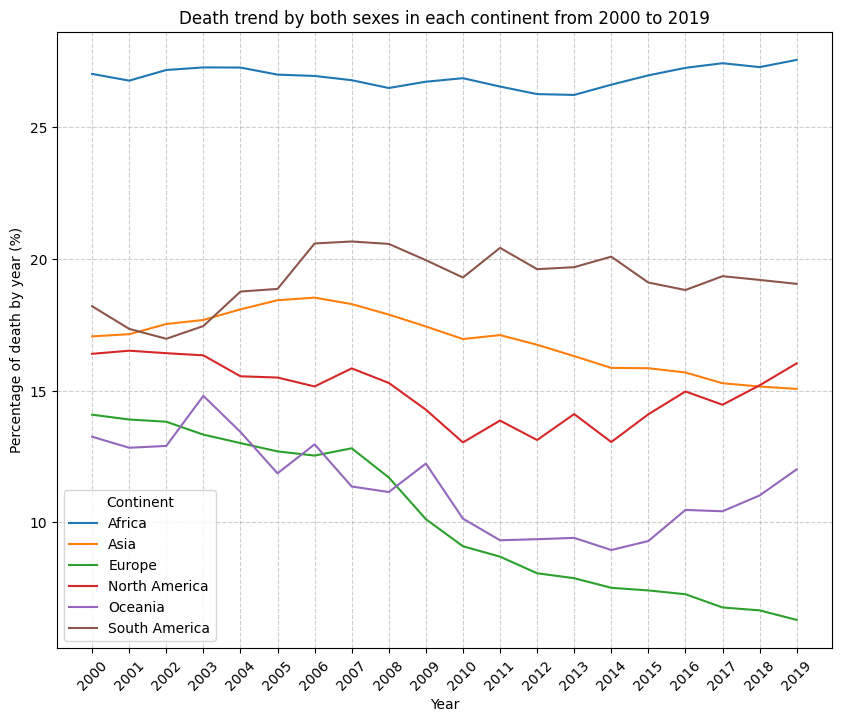

In [252]:
# draw a line chart displays the death trend in each continent from 2000 to 2019
years = [str(year) for year in range(2000, 2020)]    
deaths_year_cont_dict = {}

for continent in df_sum_continent.index:  # Lặp qua từng châu lục
    deaths_year_cont_dict[continent] = [
        df_sum_continent.loc[continent, (year, "Both sexes")] if (year, "Both sexes") in df_sum_continent.columns else None
        for year in years
    ]
plt.figure(figsize=(10,8))
plt.xlabel("Year")
plt.ylabel("Percentage of death by year (%)")
plt.title("Death trend by both sexes in each continent from 2000 to 2019")
for continent, deaths in deaths_year_cont_dict.items():
    plt.plot(years, deaths, label=continent)

plt.legend(title="Continent")  # Thêm chú thích
plt.xticks(rotation=45)  # Xoay trục x cho dễ đọc
plt.grid(True, linestyle="--", alpha=0.6)  # Thêm lưới nhẹ
plt.show()


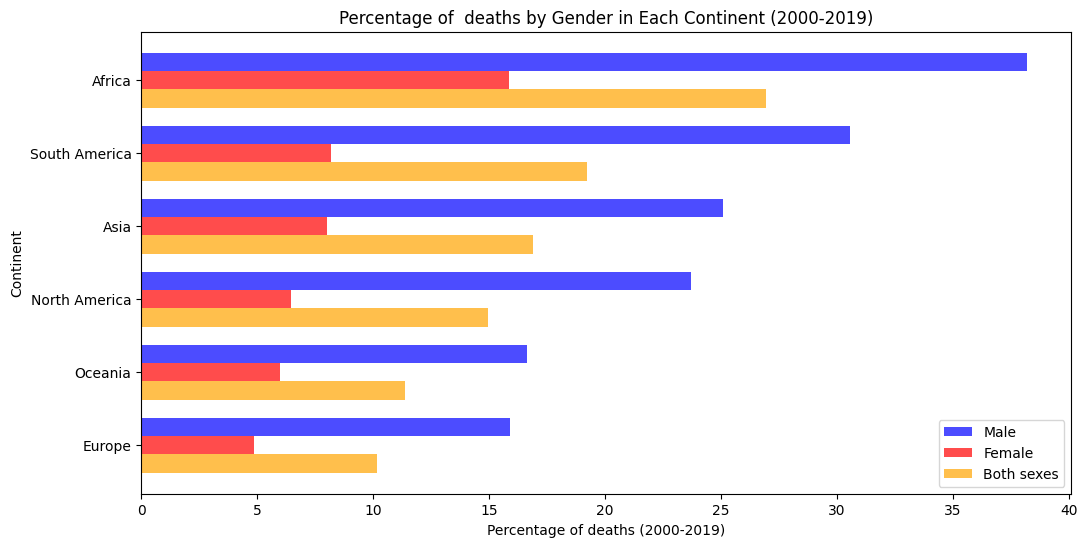

In [254]:
# Create lists of columns for "Male" and "Female" deaths from 2000 to 2019
male_cols = [(str(year).strip(), "Male") for year in range(2000, 2020) if (str(year).strip(), "Male") in df.columns]
female_cols = [(str(year).strip(), "Female") for year in range(2000, 2020) if (str(year).strip(), "Female") in df.columns]

# Group by continent and sum the total deaths for "Male" and "Female" each year
df_sum_continent_male = df_sorted.groupby(("continent_list", "Continent"))[male_cols].mean()
df_sum_continent_female = df_sorted.groupby(("continent_list", "Continent"))[female_cols].mean()

total_male_deaths = df_sum_continent_male.mean(axis=1)
total_female_deaths = df_sum_continent_female.mean(axis=1)

total_male_deaths.sort_values(ascending=False, inplace=True)
total_female_deaths.sort_values(ascending=False, inplace=True)  
total_both_sexes_values = total_both_sexes["sum_both_sexes"].values

# Extract continent names
continents = total_male_deaths.index
# Set up bar positions
y_indexes = np.arange(len(continents))
height = 0.25  # Width of each bar in horizontal bar chart

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(y_indexes - height, total_male_deaths, height=height, label="Male", color="blue", alpha=0.7)
plt.barh(y_indexes, total_female_deaths, height=height, label="Female", color="red", alpha=0.7)
plt.barh(y_indexes + height, total_both_sexes_values, height=height, label="Both sexes", color="orange", alpha=0.7)


# Customize the plot
plt.yticks(ticks=y_indexes, labels=continents)
plt.ylabel("Continent")
plt.xlabel("Percentage of deaths (2000-2019)")
plt.title("Percentage of  deaths by Gender in Each Continent (2000-2019)")
plt.legend()

# Invert y-axis to match descending order
plt.gca().invert_yaxis()

# Show the chart
plt.show()



In [236]:
df_sum_continent_male

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
"(continent_list, Continent)",,,,,,,,,,,,,,,,,,,,
Africa,2048.7,2032.7,2067.1,2077.8,2077.9,2055.8,2054.5,2041.3,2019.4,2043.8,2058.2,2038.2,2018.1,2014.9,2048.9,2077.3,2105.1,2120.4,2109.1,2132.3
Asia,1176.7,1184.1,1207.4,1221.7,1249.5,1276.9,1282.1,1270.9,1251.8,1218.9,1183.1,1196.1,1172.3,1144.4,1112.5,1110.5,1098.8,1075.7,1068.1,1061.1
Europe,853.8,841.9,840.5,812.4,793.7,771.0,765.4,787.3,723.0,617.5,553.6,528.5,493.0,475.3,457.5,449.5,441.3,406.9,401.9,380.1
North America,544.6,548.0,537.7,542.3,512.6,506.8,495.0,523.5,508.4,479.7,429.7,459.3,431.0,470.7,434.8,474.9,505.0,488.8,514.7,544.5
Oceania,192.0,185.9,188.1,217.9,199.5,176.4,194.2,166.4,162.9,175.8,148.7,136.1,137.5,135.6,129.7,135.5,153.4,151.8,161.1,175.5
South America,341.5,327.3,319.1,328.2,353.9,354.5,384.4,391.4,392.1,382.5,365.3,391.1,378.1,380.4,389.9,370.3,364.1,374.5,371.5,368.2


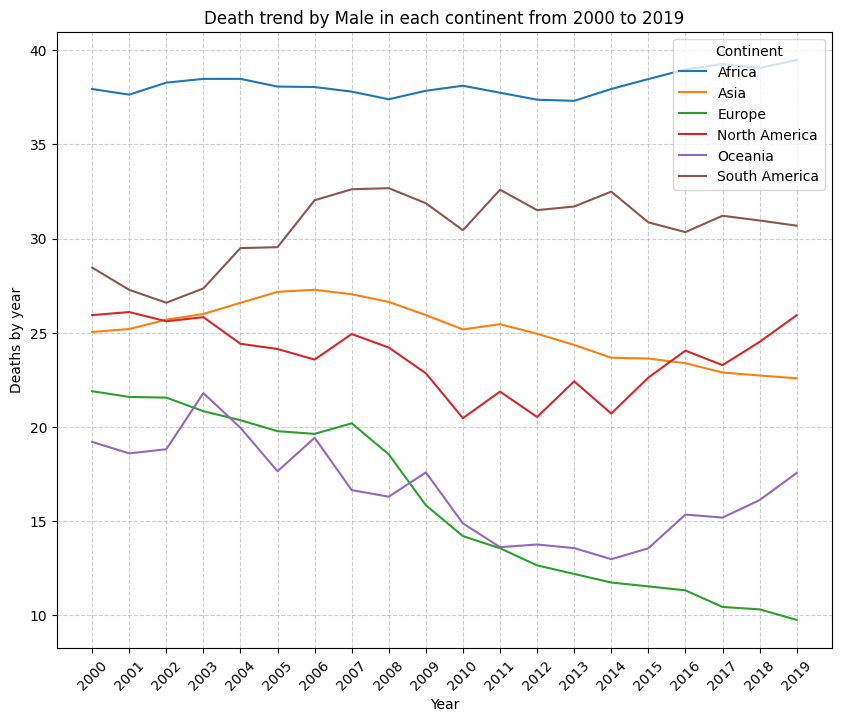

In [255]:
#draw line chart for male
years = [str(year) for year in range(2000, 2020)]
deaths_year_cont_dict_male = {}

for continent in df_sum_continent_male.index:  # Lặp qua từng châu lục
    deaths_year_cont_dict_male[continent] = [
        df_sum_continent_male.loc[continent, (year, "Male")] if (year, "Male") in df_sum_continent_male.columns else None
        for year in years
    ]
plt.figure(figsize=(10,8))
plt.xlabel("Year")
plt.ylabel("Deaths by year")
plt.title("Death trend by Male in each continent from 2000 to 2019")
for continent, deaths in deaths_year_cont_dict_male.items():
    plt.plot(years, deaths, label=continent)

plt.legend(title="Continent", loc="upper right")  # Thêm chú thích
plt.xticks(rotation=45)  # Xoay trục x cho dễ đọc
plt.grid(True, linestyle="--", alpha=0.6)  # Thêm lưới nhẹ
plt.show()


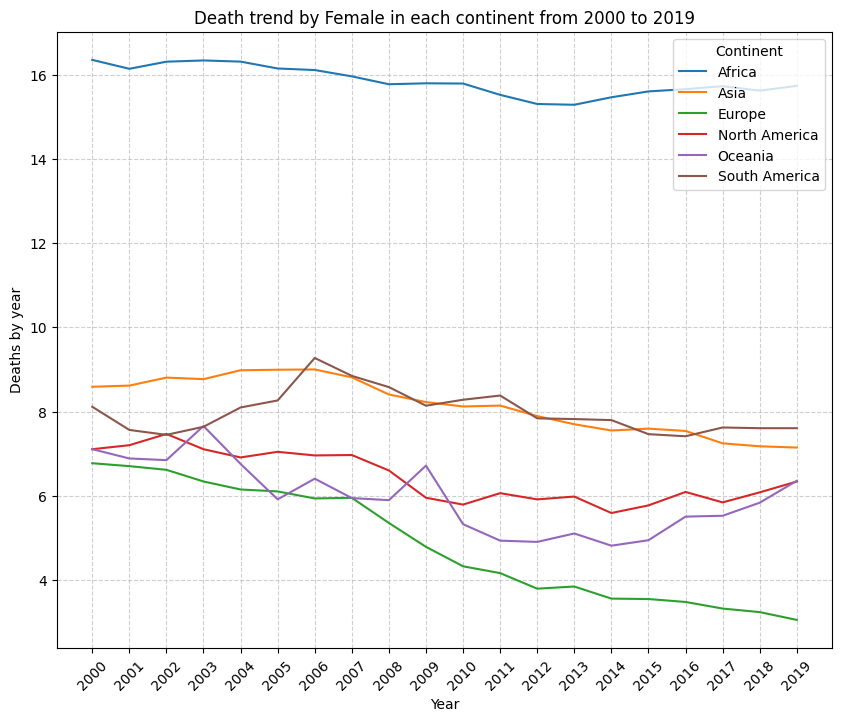

In [256]:
#draw line chart for female
years = [str(year) for year in range(2000, 2020)]
deaths_year_cont_dict_female= {}

for continent in df_sum_continent_female.index:  # Lặp qua từng châu lục
    deaths_year_cont_dict_female[continent] = [
        df_sum_continent_female.loc[continent, (year, "Female")] if (year, "Female") in df_sum_continent_female.columns else None
        for year in years
    ]
plt.figure(figsize=(10,8))
plt.xlabel("Year")
plt.ylabel("Deaths by year")
plt.title("Death trend by Female in each continent from 2000 to 2019")
for continent, deaths in deaths_year_cont_dict_female.items():
    plt.plot(years, deaths, label=continent)

plt.legend(title="Continent", loc="upper right")  # Thêm chú thích
plt.xticks(rotation=45)  # Xoay trục x cho dễ đọc
plt.grid(True, linestyle="--", alpha=0.6)  # Thêm lưới nhẹ
plt.show()
